# Homework 1 - Master File

STAT 479: Machine Learning (Fall 2018)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-fs2018/

---
## HW Ideas

1. Run scikit-learn to reproduce the results KNN classifier
2. replace euclidean distance in KNNClassifier by manhattan distance, report the distances of the top 5 neighbors
3. Add a weighting to the k-nearest neighbors, compare results with scikit-learn
4. Predict continuous values instead of class labels
5. Finish the predict_proba method to return a confidence score 
6. How are ties being resolved by the predict function? What happens if 
7. use iris dataset
8. split dataset and experiment with different values of k
9. experiment with k
10. Training, testing and cross-validation
11. Bonus. Vectorize the for-loop in the _find_nearest method to speed up the algorithm. Tip: use pdist. You can benchmark using %timeit

---

The watermark package that is being used in the next code cell provides a helper function of the same name, `%watermark` for showing information about your computational environment. This is usefult to keep track of what software versions are/were being used. If you should encounter issues with the code, please make sure that your software package have the same version as the the ones shown in the pre-executed watermark cell.

Before you execute the watermark cell, you need to install watermark first. If you have not done this yet. To install the watermark package, simply run 

    !pip install watermark
    
or 

    !conda install watermark -c conda-forge
    
in the a new code cell. Alternatively, you can run either of the two commands (the latter only if you have installed Anaconda or Miniconda) in your command line terminal (e.g., a Linux shell, the Terminal app on macOS, or Cygwin, Putty, etc. on Windows).

For more information installing Python, please refer to the previous lectures and ask the TA for help.

In [1]:
%load_ext watermark
%watermark  -d -u -a '<Your Name>' -v -p numpy,scipy,matplotlib,sklearn

<Your Name> 
last updated: 2018-09-07 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.0
scipy 1.1.0
matplotlib 2.2.2
sklearn 0.19.1


## >>> Generate Dataset

In [162]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


X, y = make_blobs(n_samples=800,
                  centers=2,
                  cluster_std=4.0,
                  shuffle=True, 
                  random_state=789)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0,
                                                    stratify=y)


train_data = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1)
test_data = np.concatenate((X_test, y_test[:, np.newaxis]), axis=1)


train_data = pd.DataFrame(train_data)
train_data[2] = train_data[2].astype(int)

test_data = pd.DataFrame(test_data)
test_data[2] = test_data[2].astype(int)

train_data.columns = ['x1', 'x2', 'y']
test_data.columns = train_data.columns

train_data.to_csv('train_data.txt', sep=' ', float_format='%.2f', index=None)
test_data.to_csv('test_data.txt', sep=' ', float_format='%.2f', index=None)

X ~ n_samples x n_features: (800, 2)
y ~ n_samples: (800,)


In [163]:
df_train = pd.read_csv('train_data.txt', delimiter=' ')

df_train.head()

,x1,x2,y
0,-3.84,-4.40,0
1,16.36,6.54,1
2,-2.73,-5.13,0
3,4.83,7.22,1
4,3.66,-5.34,0


In [519]:
X_train = df_train[['x1', 'x2']].values
y_train = df_train['y'].values

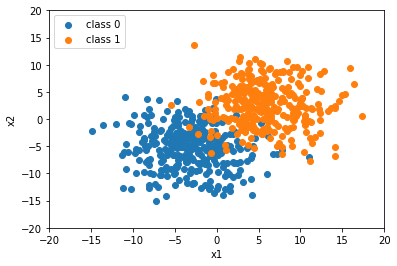

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1], 
            label='class 0',)

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1], 
            label='class 1',)

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.legend(loc='upper left')
plt.show()

In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

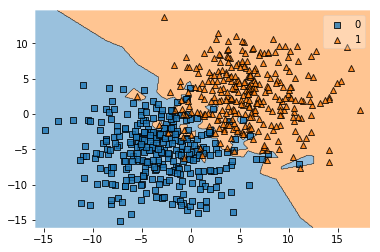

In [167]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, knn)

In [168]:
print('Errors:', (knn.predict(X_train) != y_train).sum())

Errors: 0


Errors: 33


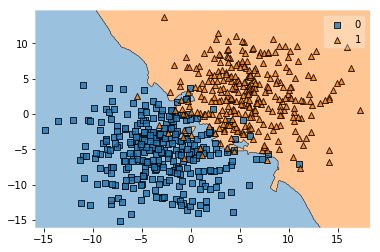

In [169]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, knn)
print('Errors:', (knn.predict(X_train) != y_train).sum())

Errors: 32


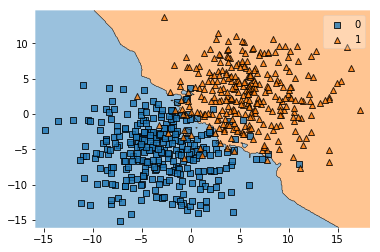

In [170]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, knn)
print('Errors:', (knn.predict(X_train) != y_train).sum())

Errors: 29


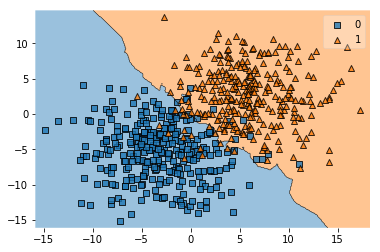

In [171]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, knn)
print('Errors:', (knn.predict(X_train) != y_train).sum())

Errors: 30


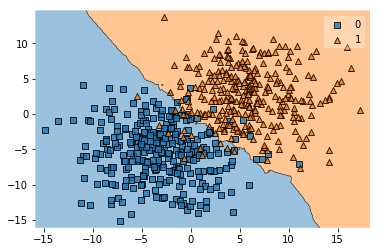

In [175]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, knn)
print('Errors:', (knn.predict(X_train) != y_train).sum())

In [176]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print('%2d:' % k,
          '| Train err: %2d' % (knn.predict(X_train) != y_train).sum(),
          '| Test err: %2d' % (knn.predict(X_test) != y_test).sum())

 1: | Train err:  0 | Test err: 16
 2: | Train err: 29 | Test err: 16
 3: | Train err: 33 | Test err: 10
 4: | Train err: 30 | Test err:  9
 5: | Train err: 32 | Test err:  9
 6: | Train err: 32 | Test err:  9
 7: | Train err: 29 | Test err:  9
 8: | Train err: 31 | Test err:  8
 9: | Train err: 30 | Test err:  9
10: | Train err: 31 | Test err: 10
11: | Train err: 32 | Test err:  9
12: | Train err: 32 | Test err:  9
13: | Train err: 32 | Test err:  9
14: | Train err: 32 | Test err:  8


In [177]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train,
                                                          test_size=0.3,
                                                          random_state=123,
                                                          stratify=y_train)

In [178]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print('%2d:' % k,
          '| TrainSub err: %2d' % (knn.predict(X_train_sub) != y_train_sub).sum(),
          '| Val err: %2d' % (knn.predict(X_val) != y_val).sum(),
          '| Train err: %2d' % (knn.predict(X_train) != y_train).sum(),
          '| Test err: %2d' % (knn.predict(X_test) != y_test).sum())

 1: | TrainSub err:  0 | Val err:  0 | Train err:  0 | Test err: 16
 2: | TrainSub err: 17 | Val err: 12 | Train err: 29 | Test err: 16
 3: | TrainSub err: 22 | Val err: 11 | Train err: 33 | Test err: 10
 4: | TrainSub err: 19 | Val err: 11 | Train err: 30 | Test err:  9
 5: | TrainSub err: 19 | Val err: 13 | Train err: 32 | Test err:  9
 6: | TrainSub err: 19 | Val err: 13 | Train err: 32 | Test err:  9
 7: | TrainSub err: 19 | Val err: 10 | Train err: 29 | Test err:  9
 8: | TrainSub err: 19 | Val err: 12 | Train err: 31 | Test err:  8
 9: | TrainSub err: 19 | Val err: 11 | Train err: 30 | Test err:  9
10: | TrainSub err: 20 | Val err: 11 | Train err: 31 | Test err: 10
11: | TrainSub err: 20 | Val err: 12 | Train err: 32 | Test err:  9
12: | TrainSub err: 20 | Val err: 12 | Train err: 32 | Test err:  9
13: | TrainSub err: 20 | Val err: 12 | Train err: 32 | Test err:  9
14: | TrainSub err: 20 | Val err: 12 | Train err: 32 | Test err:  8


## Dataset

In [425]:
import numpy as np


class KNNClassifier(object):
    def __init__(self, k, dist_fn=None):
        self.k = k
        if dist_fn is None:
            self.dist_fn = self._euclidean_dist
    
    def _euclidean_dist(self, a, b):
        dist = 0.
        for ele_i, ele_j in zip(a, b):
            dist += ((ele_i - ele_j)**2)
        dist = dist**0.5
        return dist
        
    def _find_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))
            
        sorted_dist_idx_pairs = dist_idx_pairs.sorted()

        return sorted_dist_idx_pairs
    
    def fit(self, X, y):
        self.dataset_ = X.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)

    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            k_nearest = self._find_nearest(X[i])
            indices = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indices]
            counts = np.bincount(k_labels,
                                 minlength=self.possible_labels_.shape[0])
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return predictions

In [426]:
five_test_inputs = X_test[:5]
five_test_labels = y_test[:5]

knn = KNNClassifier(k=1)
knn.fit(five_test_inputs, five_test_labels)
print(five_test_labels)
print(knn.predict(five_test_inputs))

[0 1 1 0 1]
[0 1 1 0 1]


In [433]:
def euclidean_dist(a, b):
    dist = 0.
    for ele_i, ele_j in zip(a, b):
        dist += ((ele_i - ele_j)**2)
    dist = dist**0.5
    return dist

In [435]:
rng = np.random.RandomState(123)

a = rng.rand(100)
b = rng.rand(100)

In [436]:
%timeit euclidean_dist(a, b)

51.1 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [437]:
%timeit np.sqrt(np.sum((a-b)**2))

6.94 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [438]:
%timeit np.linalg.norm(a-b)

4.93 µs ± 40.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [452]:
c = rng.rand(10000)

In [459]:
%timeit sorted(c)[:3]

51.8 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [461]:
from heapq import nsmallest

%timeit nsmallest(3, c)

8.36 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [460]:
%timeit np.sort(c)[:3]

6.93 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [471]:
%timeit c[np.argpartition(c, 3)[:3]]

1.22 ms ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Bonus: Implement one or more of these techniques

In [494]:
import numpy as np


class KNNClassifierImproved(object):
    def __init__(self, k, dist_fn=None):
        self.k = k
        if dist_fn is None:
            self.dist_fn = self._euclidean_dist
    
    def _euclidean_dist(self, a, b):
        return np.linalg.norm(a-b)
        
    def _find_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))

        return nsmallest(self.k, dist_idx_pairs)
    
    def fit(self, X, y):
        self.dataset_ = X.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)

    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            k_nearest = self._find_nearest(X[i])
            indices = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indices]
            counts = np.bincount(k_labels,
                                 minlength=self.possible_labels_.shape[0])
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return predictions

In [530]:
from sklearn.metrics import accuracy_score


knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
print(accuracy_score(knn_sklearn.predict(X_train), y_train))


knn_bad = KNNClassifier(k=3)
knn_bad.fit(X_train, y_train)
print(accuracy_score(knn_bad.predict(X_train), y_train))

knn_improved = KNNClassifierImproved(k=3)
knn_improved.fit(X_train, y_train)
print(accuracy_score(knn_improved.predict(X_train), y_train))

0.945
0.945
0.945


In [531]:
%timeit knn_sklearn.predict(X_train)

1.07 ms ± 9.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [532]:
%timeit knn_bad.predict(X_train)

3.42 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [533]:
%timeit knn_improved.predict(X_train)

2.63 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
